In [18]:
#importing dependancies 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

In [19]:
#loading the dataset to a pandas Dataframe
data = pd.read_csv('datasets/diamond_security_system.csv')

In [20]:
# printing the head of data
data.head()

,DiamondID,DiamondName,DateOfMining,OwnerName,DiamondPrice,DiamondRating,Carat,Cut,Color,Clarity,...,Fluorescence,Girdle,Culet,Length_CW_Ratio,Width_CW_Ratio,Height_CW_Ratio,Ang_Pav_Polish,Ang_Girdle,Ang_Culet,Authentic
0,GIA10000,Kohinoor,1526,Ananya Patel,576625,7.57,0.3,3,4,3.0,...,Faint,Thin,Large,1.037574,0.963787,0.854893,0.273462,5.100208,6.473731,1
1,GIA10001,Hope Diamond,1666,Aditya Sharma,557419,8.14,0.7,4,5,2.0,...,Faint,Thick,Large,1.475181,0.677883,0.555914,9.924448,3.329701,2.347622,1
2,GIA10002,Blue Moon Diamond,2014,Aarav Singh,665386,9.03,0.5,1,6,4.0,...,Medium,Medium,Large,1.153349,0.867040,0.687244,1.077413,8.218450,6.763676,1
3,GIA10003,Star of Africa,1905,Akshay Desai,456223,9.99,1.5,3,5,3.0,...,Faint,Medium,Small,0.517262,1.933256,0.435962,8.855525,4.592631,3.086526,1
4,GIA10004,Regent Diamond,1701,Bhavya Joshi,563894,9.32,0.9,2,7,0.1,...,NaN,Medium,Small,0.914433,1.093574,0.347979,4.132917,6.861855,7.191979,1


In [21]:
# number of rows and columns
data.shape

(301, 28)

In [22]:
# Check summary statistics
print(data.describe())

       DateOfMining   DiamondPrice  DiamondRating       Carat         Cut  \
count    301.000000     301.000000     301.000000  301.000000  301.000000   
mean    1914.431894  199663.767442       8.227575    0.902658    2.465116   
std       70.512643  271793.160832       1.007196    0.331350    1.114875   
min     1526.000000   18295.000000       6.510000    0.300000    1.000000   
25%     1863.000000   18485.000000       7.390000    0.600000    1.000000   
50%     1921.000000   18718.000000       8.260000    0.800000    2.000000   
75%     1974.000000  367691.000000       9.120000    1.200000    3.000000   
max     2022.000000  983637.000000      10.000000    1.500000    4.000000   

            Color     Clarity    Symmetry       Depth       Table     Length   \
count  301.000000  301.000000  301.000000  301.000000  301.000000  301.000000   
mean     6.069767    2.118272    2.013289   59.822632   59.908852    6.377651   
std      1.411305    1.436488    0.832560    6.006179    5.6900

In [23]:
# Check data types and missing values
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   DiamondID          301 non-null    object 
 1   DiamondName        301 non-null    object 
 2   DateOfMining       301 non-null    int64  
 3   OwnerName          301 non-null    object 
 4   DiamondPrice       301 non-null    int64  
 5   DiamondRating      301 non-null    float64
 6   Carat              301 non-null    float64
 7   Cut                301 non-null    int64  
 8   Color              301 non-null    int64  
 9   Clarity            301 non-null    float64
 10  Symmetry           301 non-null    int64  
 11  Depth              301 non-null    float64
 12  Table              301 non-null    float64
 13   Length            301 non-null    float64
 14   Width             301 non-null    float64
 15   Height            301 non-null    float64
 16   Cut_Grade         301 non

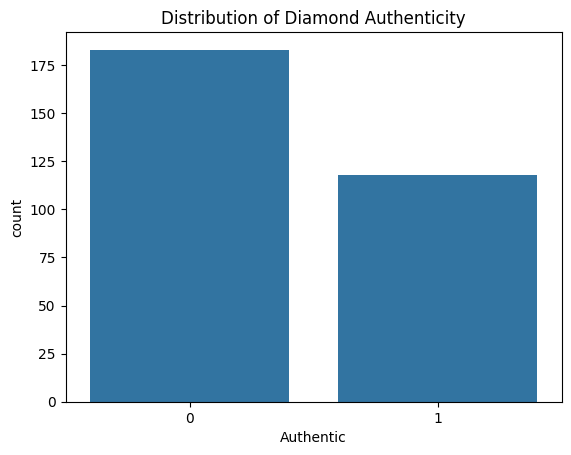

In [24]:
# Visualize the distribution of target variable
sns.countplot(x='Authentic', data=data)
plt.title('Distribution of Diamond Authenticity')
plt.show()

In [38]:
# List of columns to drop
columns_to_drop = ['DiamondID', 'DiamondName', 'DateOfMining', 'OwnerName', 'DiamondRating']

In [39]:
# Drop the specified columns
new_dataset = data.drop(columns=columns_to_drop)

In [40]:
new_dataset.head()

,DiamondPrice,Carat,Cut,Color,Clarity,Symmetry,Depth,Table,Length,Width,...,Fluorescence,Girdle,Culet,Length_CW_Ratio,Width_CW_Ratio,Height_CW_Ratio,Ang_Pav_Polish,Ang_Girdle,Ang_Culet,Authentic
0,576625,0.3,3,4,3.0,3,69.353189,69.930748,5.597605,5.394899,...,Faint,Thin,Large,1.037574,0.963787,0.854893,0.273462,5.100208,6.473731,1
1,557419,0.7,4,5,2.0,2,66.284807,60.916175,9.783854,6.632307,...,Faint,Thick,Large,1.475181,0.677883,0.555914,9.924448,3.329701,2.347622,1
2,665386,0.5,1,6,4.0,3,52.999363,66.486434,6.242801,5.412760,...,Medium,Medium,Large,1.153349,0.867040,0.687244,1.077413,8.218450,6.763676,1
3,456223,1.5,3,5,3.0,3,69.838606,52.382877,3.729146,7.209393,...,Faint,Medium,Small,0.517262,1.933256,0.435962,8.855525,4.592631,3.086526,1
4,563894,0.9,2,7,0.1,1,55.348372,65.555957,6.730675,7.360492,...,NaN,Medium,Small,0.914433,1.093574,0.347979,4.132917,6.861855,7.191979,1


In [41]:
new_dataset.shape

(301, 23)

In [42]:
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   DiamondPrice       301 non-null    int64  
 1   Carat              301 non-null    float64
 2   Cut                301 non-null    int64  
 3   Color              301 non-null    int64  
 4   Clarity            301 non-null    float64
 5   Symmetry           301 non-null    int64  
 6   Depth              301 non-null    float64
 7   Table              301 non-null    float64
 8    Length            301 non-null    float64
 9    Width             301 non-null    float64
 10   Height            301 non-null    float64
 11   Cut_Grade         301 non-null    object 
 12   Polish_Grade      301 non-null    object 
 13   Fluorescence      225 non-null    object 
 14   Girdle            301 non-null    object 
 15   Culet             222 non-null    object 
 16   Length_CW_Ratio   301 non

In [53]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the original dataset
encoded_dataset = new_dataset  # Replace "original_dataset.csv" with the path to your dataset

# List of columns to encode
columns_to_encode = [' Cut_Grade ',' Polish_Grade ', ' Fluorescence ', ' Girdle ', ' Culet ']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to each column
for column in columns_to_encode:
    # Extract the column
    column_data = encoded_dataset[column]
    
    # Fit and transform the column
    encoded_data = label_encoder.fit_transform(column_data)
    
    # Replace the original column with the encoded values
    encoded_dataset[column] = encoded_data

In [55]:
encoded_dataset.head()

,DiamondPrice,Carat,Cut,Color,Clarity,Symmetry,Depth,Table,Length,Width,...,Fluorescence,Girdle,Culet,Length_CW_Ratio,Width_CW_Ratio,Height_CW_Ratio,Ang_Pav_Polish,Ang_Girdle,Ang_Culet,Authentic
0,576625,0.3,3,4,3.0,3,69.353189,69.930748,5.597605,5.394899,...,0,2,0,1.037574,0.963787,0.854893,0.273462,5.100208,6.473731,1
1,557419,0.7,4,5,2.0,2,66.284807,60.916175,9.783854,6.632307,...,0,1,0,1.475181,0.677883,0.555914,9.924448,3.329701,2.347622,1
2,665386,0.5,1,6,4.0,3,52.999363,66.486434,6.242801,5.412760,...,1,0,0,1.153349,0.867040,0.687244,1.077413,8.218450,6.763676,1
3,456223,1.5,3,5,3.0,3,69.838606,52.382877,3.729146,7.209393,...,0,0,2,0.517262,1.933256,0.435962,8.855525,4.592631,3.086526,1
4,563894,0.9,2,7,0.1,1,55.348372,65.555957,6.730675,7.360492,...,3,0,2,0.914433,1.093574,0.347979,4.132917,6.861855,7.191979,1


In [57]:
encoded_dataset.shape

(301, 23)

In [62]:
# separating data and Labels
X = encoded_dataset.iloc[:,:-1]
print(X)

     DiamondPrice  Carat  Cut  Color  Clarity  Symmetry      Depth      Table  \
0          576625    0.3    3      4      3.0         3  69.353189  69.930748   
1          557419    0.7    4      5      2.0         2  66.284807  60.916175   
2          665386    0.5    1      6      4.0         3  52.999363  66.486434   
3          456223    1.5    3      5      3.0         3  69.838606  52.382877   
4          563894    0.9    2      7      0.1         1  55.348372  65.555957   
..            ...    ...  ...    ...      ...       ...        ...        ...   
296         18304    0.7    3      5      2.0         3  52.384508  69.848248   
297         18299    1.3    1      6      0.5         1  52.267931  53.521215   
298         18296    0.6    3      4      0.1         1  58.449290  68.270501   
299         18295    1.2    4      7      2.0         1  63.263329  54.192144   
300         18295    0.7    3      8      3.0         1  60.864202  64.632861   

      Length     Width   ..

In [64]:
Y = encoded_dataset.iloc[:,-1]
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
296    0
297    0
298    0
299    0
300    0
Name: Authentic, Length: 301, dtype: int64


In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, stratify=Y, random_state=1)
print(X.shape, X_train.shape, X_test.shape)

(301, 22) (270, 22) (31, 22)


In [66]:
# use of SVC algorithm
from sklearn.svm import SVC
model_svc = SVC()
model_svc.fit(X_train,Y_train)

SVC()

In [67]:
# accuracy of SVC algorithm

#accuracy on training data
X_train_prediction = model_svc.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on training data : ', training_data_accuracy)

#accuracy on test data
X_test_prediction = model_svc.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on test data : ', test_data_accuracy)
ov = ((training_data_accuracy+test_data_accuracy)/2)*100
print('Overall acuracy of SVC=',ov )

Accuracy on training data :  1.0
Accuracy on test data :  1.0
Overall acuracy of SVC= 100.0


In [68]:
# use of Naive bayes algorithm
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()
model_nb.fit(X_train,Y_train)

GaussianNB()

In [69]:
# accuracy of Naive bayes algorithm

#accuracy on training data
X_train_prediction = model_nb.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on training data : ', training_data_accuracy)

#accuracy on test data
X_test_prediction = model_nb.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on test data : ', test_data_accuracy)
ov = ((training_data_accuracy+test_data_accuracy)/2)*100
print('Overall acuracy of GaussianNB=',ov )

Accuracy on training data :  1.0
Accuracy on test data :  1.0
Overall acuracy of GaussianNB= 100.0


In [70]:
# use of KNN algorithm
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier()
model_knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [71]:
# accuracy of KNN algorithm
#accuracy on training data
X_train_prediction = model_knn.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on training data : ', training_data_accuracy)

#accuracy on test data
X_test_prediction = model_knn.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on test data : ', test_data_accuracy)
ov = ((training_data_accuracy+test_data_accuracy)/2)*100
print('Overall acuracy of KNN=',ov )

Accuracy on training data :  1.0
Accuracy on test data :  1.0
Overall acuracy of KNN= 100.0


In [72]:
# use of decision trees algorithm
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [73]:
# accuracy of decision tree algorithm
#accuracy on training data
X_train_prediction = model_dt.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on training data : ', training_data_accuracy)

#accuracy on test data
X_test_prediction = model_dt.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on test data : ', test_data_accuracy)
ov = ((training_data_accuracy+test_data_accuracy)/2)*100
print('Overall acuracy of DecisionTreeClassifier=',ov )

Accuracy on training data :  1.0
Accuracy on test data :  1.0
Overall acuracy of DecisionTreeClassifier= 100.0


In [74]:
# use of random forest algorithm
from sklearn.ensemble import RandomForestClassifier
model_rfa = RandomForestClassifier()
model_rfa.fit(X_train,Y_train)

RandomForestClassifier()

In [75]:
# accuracy of decision tree algorithm

#accuracy on training data
X_train_prediction = model_rfa.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on training data : ', training_data_accuracy)

#accuracy on test data
X_test_prediction = model_rfa.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on test data : ', test_data_accuracy)
ov = ((training_data_accuracy+test_data_accuracy)/2)*100
print('Overall acuracy of DecisionTreeClassifier=',ov )

Accuracy on training data :  1.0
Accuracy on test data :  1.0
Overall acuracy of DecisionTreeClassifier= 100.0


Confusion Matrix for Testing


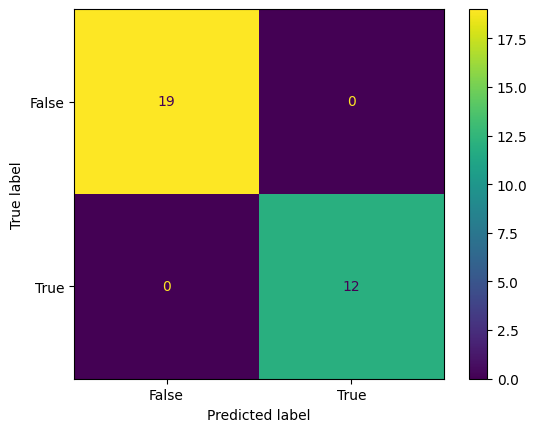

In [76]:
actual = Y_test
predicted = X_test_prediction

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
print("Confusion Matrix for Testing")
cm_display.plot()
plt.show()

Confusion Matrix for Training


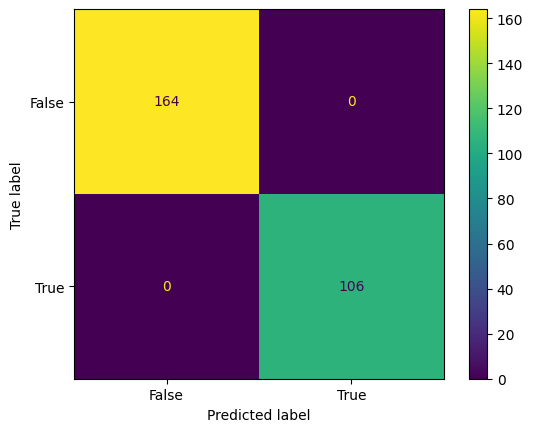

In [77]:
actual = Y_train
predicted = X_train_prediction

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
print("Confusion Matrix for Training")
cm_display.plot()
plt.show()

In [78]:
Accuracy = metrics.accuracy_score(actual, predicted)
print(Accuracy*100)

100.0


In [79]:
Precision = metrics.precision_score(actual, predicted)
print(Precision*100)

100.0


In [80]:
Sensitivity_recall = metrics.recall_score(actual, predicted)
print(Sensitivity_recall*100)

100.0


In [81]:
Specificity = metrics.recall_score(actual, predicted, pos_label=0)
print(Specificity*100)

100.0


In [82]:
F1_score = metrics.f1_score(actual, predicted)
print(F1_score*100)

100.0


In [84]:

input_data = [576625,0.3,3,4,3,3,69.3531893228229,69.9307475719108,5.59760475572973,5.39489907616003,4.61206035224794,1,1,0,0,1,1.03757358139755,0.963787068145136,0.85489279542384,0.273461565358174,5.10020792255344,6.47373121140968]

# changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the np array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model_rfa.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
  print('Diamond is a real diamond')
else:
  print('Diamond is a fake diamond')


[1]
Diamond is a real diamond


C:\Users\swaraj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [85]:
import pickle
pickle.dump(model_rfa,open('fourty_parameter_rfa.pkl','wb'))